In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import prepare3
import acquire2
import matplotlib.ticker as mtick
import inflection

from itertools import cycle, islice
from matplotlib import cm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Project Planning

   - Acquire data from the Codeup Database and store the process as a function for replication. Save the function in an acquire.py file to import into the Final Report Notebook.
   - View data to gain understanding of the dataset and to create the read.   
   - Create README.md with data dictionary, project and business goals, come up with initial hypotheses.   
   - Clean and prepare data for the first iteration through the data pipeline. Store this as a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
   - Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
   - Establish a baseline accuracy and document well.
   - Train four different classification models.
   - Evaluate models on train and validate datasets.
   - Choose the model with that performs the best and evaluate that single model on the test dataset.
   - Create csv file with the target variable, the probability of churn, and the model's prediction for each observation in the test dataset.
   - Document executive summary, conclusions, takeaways, and next steps in the Final Report Notebook.


# Executive Summary

# Data Acquisition

In [2]:
df = acquire2.get_telco_data(use_cache = True)
df.head()

Using cached csv


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


#### Takeaways:
- Will use a prepare file to drop payment_type_id, contract_type_id, and internet_service_type_id
- After confirming that customer_id is all unique values using, **df.customer_id.unique().shape**, will use prepare file to set it as the index
- Change senior_citizen to categorical for continuity in categorical variables
- Will use prepare file to obtain dummy variables 
- Will use prepare file to ensure lowercase snake_case format 
- Will eliminate '(automatic)' from payment types for plot label ease
- Will use replace to reduce likelihood of multicolinearity in eventual dummy variables

# Data Preparation

In [3]:
telco_df = prepare3.prep_telco_data(df)
train, test, validate = telco_df
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card,payment_type_electronic_check,payment_type_mailed_check
customer_id,,,,,,,,,,,,,,,,,,,,,
8331-ZXFOE,Female,No,No,No,58,Yes,Yes,Yes,Yes,Yes,...,1,0,0,1,0,0,0,1,0,0
2790-XUYMV,Male,No,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
7107-UBYKY,Female,No,Yes,Yes,35,Yes,Yes,No,No,No,...,0,0,0,0,0,0,1,0,1,0
3373-YZZYM,Male,No,Yes,Yes,1,Yes,No,No,No,No,...,0,0,0,0,0,0,1,0,0,1
8883-GRDWQ,Male,Yes,No,No,20,Yes,No,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1


# Exploratory Data Analysis/Statistical Testing

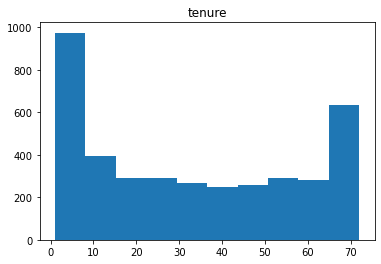

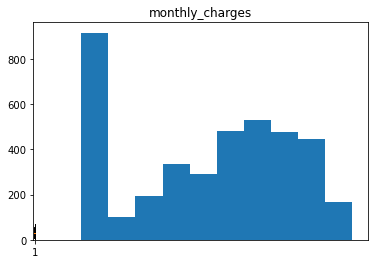

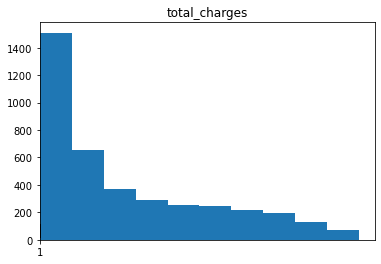

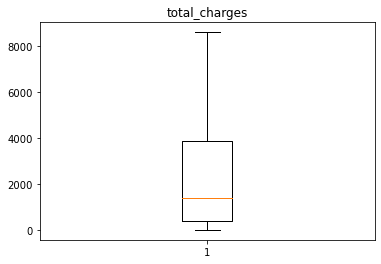

In [4]:
#plot numeric columns
num_cols = ['tenure', 'monthly_charges', 'total_charges']

#train.columns[[train[col].dtype == 'float64' for col in train.columns]]

for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show

#### Visualize Churn on Train Data

In [5]:
#create data copy on train to work on visualizations
data_viz = train.copy()
data_viz.loc[:, 'churn'] = data_viz.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

#create horizontal stacked plot bar
#import inflection
def stacked_bar_plot(data, x, y, orient = 'horizontal', ax = None, show = True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize = (8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index = data[x], columns = data[y], normalize = 'index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis = 1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending = False)
    crosstab.plot(kind = 'bar', stacked = True, ax = ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x = i,
                  y = (y_loc - proportion) + (proportion / 2),
                  s = f'{proportion*100:.1f}%',
                  color = 'white',
                  fontsize = 14,
                  fontweight = 'bold',
                  horizontalalignment = 'center',
                  verticalalignment = 'center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending = True)
    crosstab.plot(kind = 'barh', stacked = True, ax = ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y = i,
                  x = (x_loc - proportion) + (proportion / 2),
                  s = f'{proportion*100:.1f}%',
                  color = 'white',
                  fontsize = 14,
                  fontweight = 'bold',
                  horizontalalignment = 'center',
                  verticalalignment = 'center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title = '', frameon = False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left = True, bottom = True)

  if show:
    plt.show()

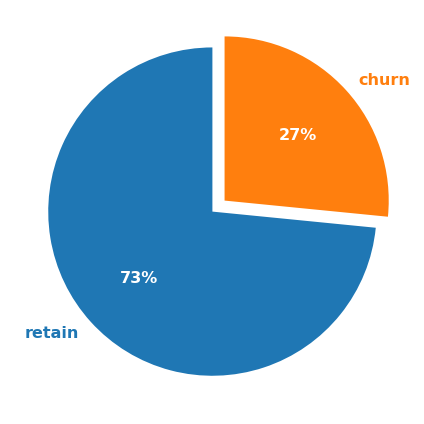

In [6]:
pie_data = data_viz['churn'].value_counts(normalize = True).values * 100
pie_label = data_viz['churn'].value_counts(normalize = True).index.to_list()

fig, ax = plt.subplots(figsize = (8, 6))

wedges, texts, autotexts = ax.pie(pie_data, labels = pie_label,
                                 startangle = 90,
                                 explode = [0, 0.1],
                                 autopct = '%.0f%%',
                                 textprops = {'color': 'w', 'fontsize':16, 'weight': 'bold'})

for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())
plt.tight_layout()
plt.show()

#### Takeaways:
- Churn represents roughly 27% of overall customers, since new customer acquisitions represents substantial costs, finding drivers of churn is crucial to improving the bottom line.

### Drivers of Churn

In [7]:
cat_col = list(train.columns)
cat_col.remove('tenure')
cat_col.remove('monthly_charges')
cat_col.remove('total_charges')

#remove redundancies
cat_col.remove('gender_encoded')
cat_col.remove('partner_encoded')
cat_col.remove('dependents_encoded')
cat_col.remove('phone_service_encoded')
cat_col.remove('paperless_billing_encoded')
cat_col.remove('senior_citizen_encoded')
cat_col.remove('multiple_lines_yes')
cat_col.remove('online_security_yes')
cat_col.remove('device_protection_yes')
cat_col.remove('tech_support_yes')
cat_col.remove('streaming_tv_yes')
cat_col.remove('streaming_movies_yes')
cat_col.remove('contract_type_one_year')
cat_col.remove('contract_type_two_year')
cat_col.remove('internet_service_type_fiber_optic')
cat_col.remove('internet_service_type_none')
cat_col.remove('payment_type_credit_card')
cat_col.remove('payment_type_electronic_check')
cat_col.remove('payment_type_mailed_check')

#remove target variables
cat_col.remove('churn')
cat_col.remove('churn_encoded')

columns = data_viz['churn']

attr_crosstab = pd.DataFrame()

for col in cat_col: #putting cols instead of col removes churn (desired result)
    #create crosstab for each attribute
    index = data_viz[col]
    ct = pd.crosstab(index = index, columns = columns, normalize = 'index', colnames = [None]).reset_index()
    
    #add prefix to each category
    #format : column name (category)
    
    col_titleize = inflection.titleize(col)
    ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')
    
    #rename the column
    
    ct.rename(columns = {col: 'attribute'}, inplace = True)
    
    #create a single dataframe
    attr_crosstab = pd.concat([attr_crosstab, ct])
    
attr_crosstab = attr_crosstab.sort_values('churn', ascending = False).reset_index(drop = True)
attr_crosstab.style.background_gradient()

,attribute,churn,retain
0,Payment Type (Electronic check),0.450737,0.549263
1,Contract Type (Month-to-month),0.428176,0.571824
2,Internet Service Type (Fiber optic),0.426829,0.573171
3,Senior Citizen (Yes),0.426772,0.573228
4,Paperless Billing (Yes),0.335628,0.664372
5,Partner (No),0.327084,0.672916
6,Online Security (No),0.317056,0.682944
7,Dependents (No),0.313297,0.686703
8,Tech Support (No),0.310579,0.689421
9,Streaming Movies (Yes),0.293965,0.706035


#### Takeaways:
- Excluding the month-to-month contract type, the top five predictions of churn are:
   - Payment Type (Electronic Check)
   - Internet Service Type (Fiber Optic)
   - Senior Citizen (Yes)
   - Paperless Billing (Yes)
   - Partner (No)

---

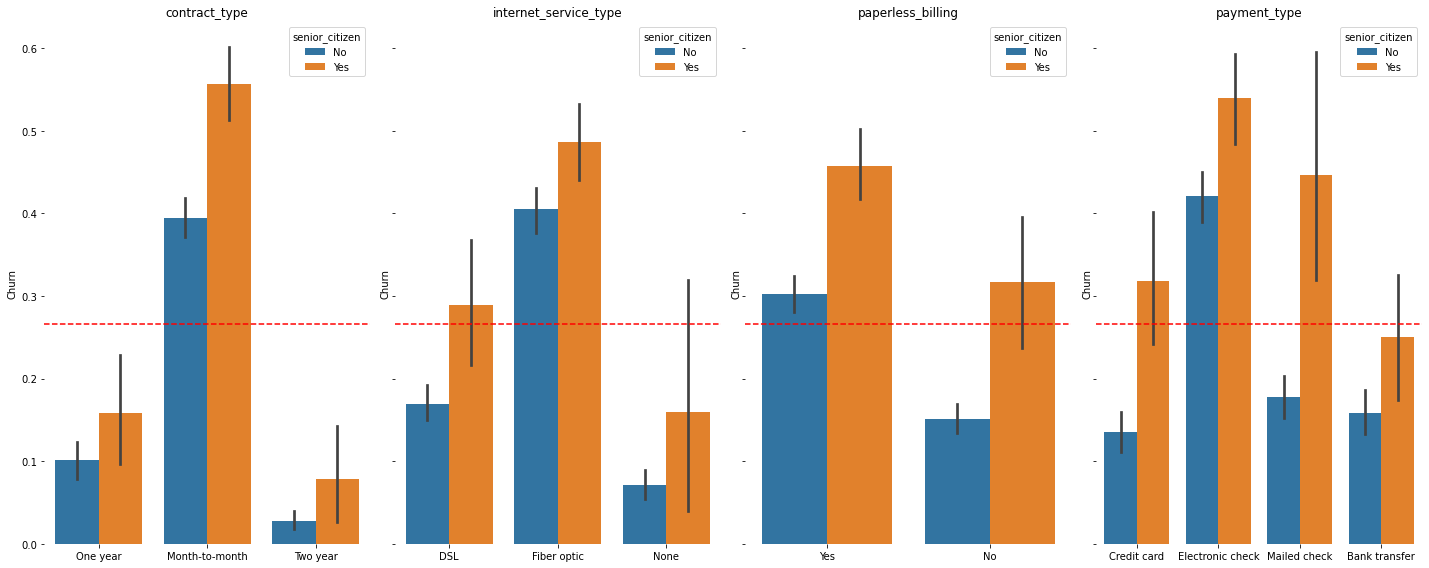

In [8]:
features = ['contract_type', 'internet_service_type', 'paperless_billing', 'payment_type']

_, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 8), sharey = True)
for i, feature in enumerate (features):
    sns.barplot(feature, 'churn_encoded', data = train, ax = ax[i], hue = 'senior_citizen')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    ax[i].axhline(train.churn_encoded.mean(), ls = '--', color = 'red')

sns.despine(left = True, bottom = True)
plt.tight_layout()    
plt.show()

In [9]:
null = "seniority and contract types are independent."
alt = "there is a relationship between seniority and contract types."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.senior_citizen, train.contract_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, seniority and contract types are independent.
Evidence suggests that there is a relationship between seniority and contract types.


In [10]:
null = "seniority and internet service types are independent."
alt = "there is a relationship between seniority and internet service types."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.senior_citizen, train.internet_service_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, seniority and internet service types are independent.
Evidence suggests that there is a relationship between seniority and internet service types.


In [11]:
null = "seniority and paperless billing are independent."
alt = "there is a relationship between seniority and paperless billing."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.senior_citizen, train.paperless_billing)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, seniority and paperless billing are independent.
Evidence suggests that there is a relationship between seniority and paperless billing.


In [12]:
null = "seniority and payment type are independent."
alt = "there is a relationship between seniority and payment type."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.senior_citizen, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, seniority and payment type are independent.
Evidence suggests that there is a relationship between seniority and payment type.


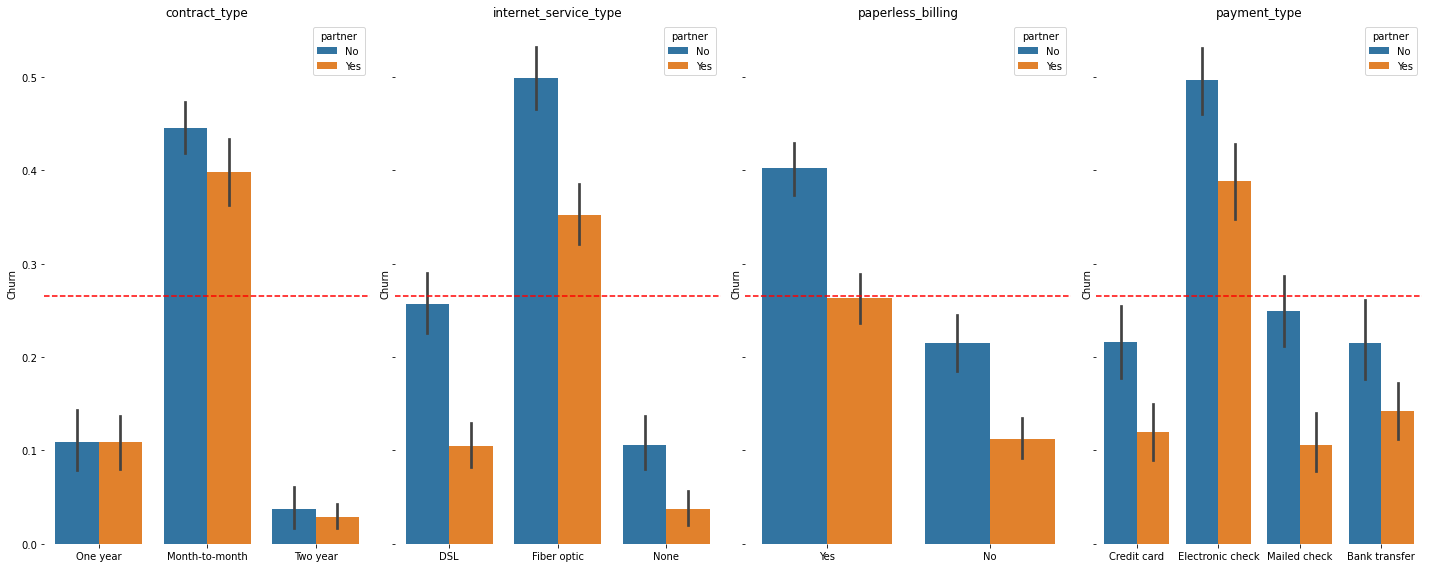

In [13]:
features = ['contract_type', 'internet_service_type', 'paperless_billing', 'payment_type']

_, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 8), sharey = True)
for i, feature in enumerate (features):
    sns.barplot(feature, 'churn_encoded', data = train, ax = ax[i], hue = 'partner')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    ax[i].axhline(train.churn_encoded.mean(), ls = '--', color = 'red')

sns.despine(left = True, bottom = True)
plt.tight_layout()
plt.show()
    

In [14]:
null = "being partnered and contract types are independent."
alt = "there is a relationship between being partnered and contract types."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.partner, train.contract_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, being partnered and contract types are independent.
Evidence suggests that there is a relationship between being partnered and contract types.


In [112]:
null = "being partnered and internet service types are independent."
alt = "there is a relationship between partnership and internet service types."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.partner, train.internet_service_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null which states', null)
    print('There is insufficient evidence to support the claim that', alt)

Fail to reject the null which states being partnered and internet service types are independent.
There is insufficient evidence to support the claim that there is a relationship between partnership and internet service types.


In [16]:
null = "being partnered and fiber optic internet service are independent."
alt = "there is a relationship between being partnered and fiber optic internet service type."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.partner, train.internet_service_type_fiber_optic)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, being partnered and fiber optic internet service are independent.
Evidence suggests that there is a relationship between being partnered and fiber optic internet service type.


In [17]:
null = "being partnered and paperless billing are independent."
alt = "there is a relationship between being partnered and paperless billing."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.partner, train.paperless_billing)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null which states,',null)
    print('There is insufficient evidence to support the claim that,', alt)

Fail to reject the null which states, being partnered and paperless billing are independent.
There is insufficient evidence to support the claim that, there is a relationship between being partnered and paperless billing.


In [18]:
null = "being partnered and payment type are independent."
alt = "there is a relationship between being partnered and payment type."
α = 0.5

#setup crosstab
observed = pd.crosstab(train.partner, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

if p < α:
    print('Reject the null hypothesis which states,', null)
    print('Evidence suggests that', alt)
else:
    print('Fail to reject the null:', null)
    print('There is insufficient evidence to support the claim that,', alt)

Reject the null hypothesis which states, being partnered and payment type are independent.
Evidence suggests that there is a relationship between being partnered and payment type.


In [19]:
df_t = pd.DataFrame(train.groupby('senior_citizen')['payment_type'].value_counts())
                   
df_t

payment_type
senior_citizen payment_type                  
No             Electronic check           965
               Mailed check               844
               Credit card                763
               Bank transfer              730
Yes            Electronic check           324
               Bank transfer              132
               Credit card                132
               Mailed check                47

<Figure size 720x576 with 0 Axes>

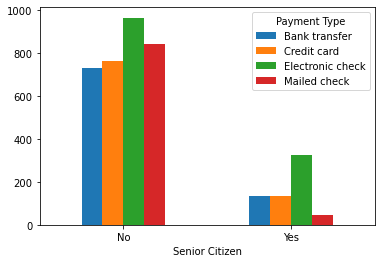

In [20]:
#df.groupby(['feature1', 'feature2']).size().unstack().plot(kind = 'bar', stacked = True)

plt.figure(figsize = (10, 8))
train.groupby('senior_citizen')['payment_type'].value_counts().unstack().plot(kind = 'bar')
plt.xticks(rotation = 0) 
plt.xlabel('Senior Citizen')
plt.legend(title = 'Payment Type')

#### Takeaways:
- Although both non-seniors and seniors pay most often with electronic check, electronic check is disproportionately favored by seniors.


In [21]:
#do senior citizens have a higher than average bill compared to non-seniors?

df_s_mc = pd.DataFrame(round(train.groupby('senior_citizen')['monthly_charges'].mean(),2)) #yes, on avg pay approximately $19 more per month
df_s_mc

,monthly_charges
senior_citizen,
No,61.83
Yes,80.30


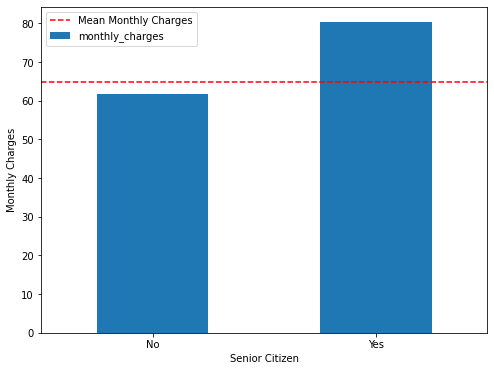

In [22]:
plt.figure(figsize = (8, 6))
train.groupby('senior_citizen')['monthly_charges'].mean().plot(kind = 'bar')
plt.xticks(rotation = 0) 
plt.xlabel('Senior Citizen')
plt.ylabel('Monthly Charges')
mean_monthly_charges = train.monthly_charges.mean()
plt.axhline(mean_monthly_charges, label = 'Mean Monthly Charges',ls = '--', color = 'red')
plt.legend()
#plt.legend(title = 'Payment Type')

#### Takeaways:
- Seniors have a higher than average monthly bill compared to their younger counterparts.

In [23]:
df_t_p = pd.DataFrame(train.groupby('partner')['payment_type'].value_counts())
                   
df_t_p

payment_type
partner payment_type                  
No      Electronic check           738
        Mailed check               533
        Credit card                393
        Bank transfer              363
Yes     Electronic check           551
        Credit card                502
        Bank transfer              499
        Mailed check               358

<Figure size 720x576 with 0 Axes>

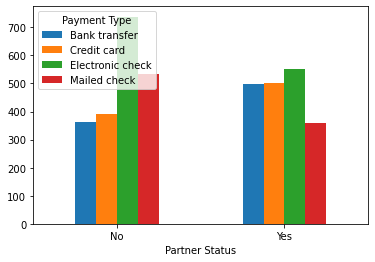

In [24]:
plt.figure(figsize = (10, 8))
train.groupby('partner')['payment_type'].value_counts().unstack().plot(kind = 'bar')
plt.xticks(rotation = 0) 
plt.xlabel('Partner Status')
plt.legend(title = 'Payment Type')

#### Takeaways:
- Electronic check is used most often in both those with partners and those without partners, but is disproportionately favored by those flying solo.

In [25]:
#do people with partners have higher monthly charges?

df_p_mc = pd.DataFrame(round(train.groupby('partner')['monthly_charges'].mean(),2))
df_p_mc

,monthly_charges
partner,
No,61.37
Yes,68.46


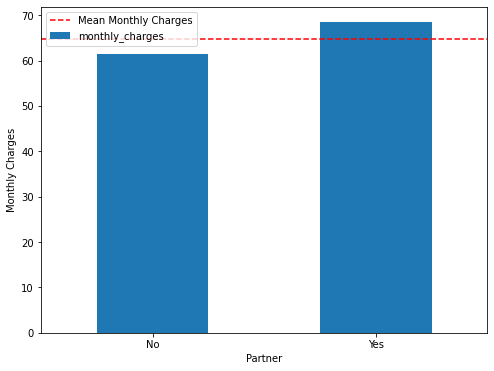

In [26]:
plt.figure(figsize = (8, 6))
train.groupby('partner')['monthly_charges'].mean().plot(kind = 'bar')
plt.xticks(rotation = 0) 
plt.xlabel('Partner')
plt.ylabel('Monthly Charges')
mean_monthly_charges = train.monthly_charges.mean()
plt.axhline(mean_monthly_charges, label = 'Mean Monthly Charges',ls = '--', color = 'red')
plt.legend()

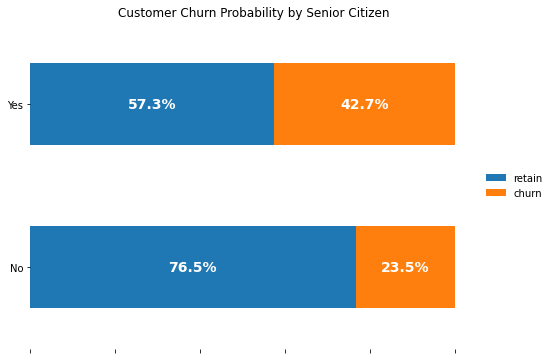

In [27]:
fig, ax = plt.subplots(figsize = (8, 6))
stacked_bar_plot(data = data_viz, x = 'senior_citizen', y = 'churn', ax = ax)

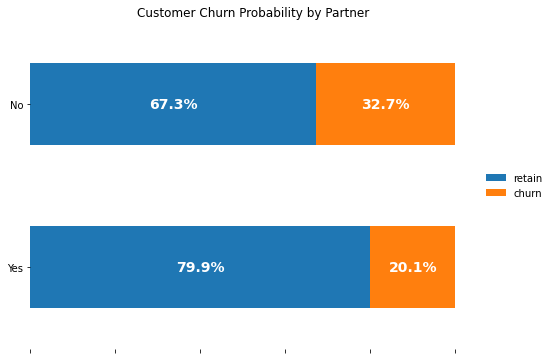

In [28]:
fig, ax = plt.subplots(figsize = (8, 6))
stacked_bar_plot(data = data_viz, x = 'partner', y = 'churn', ax = ax)

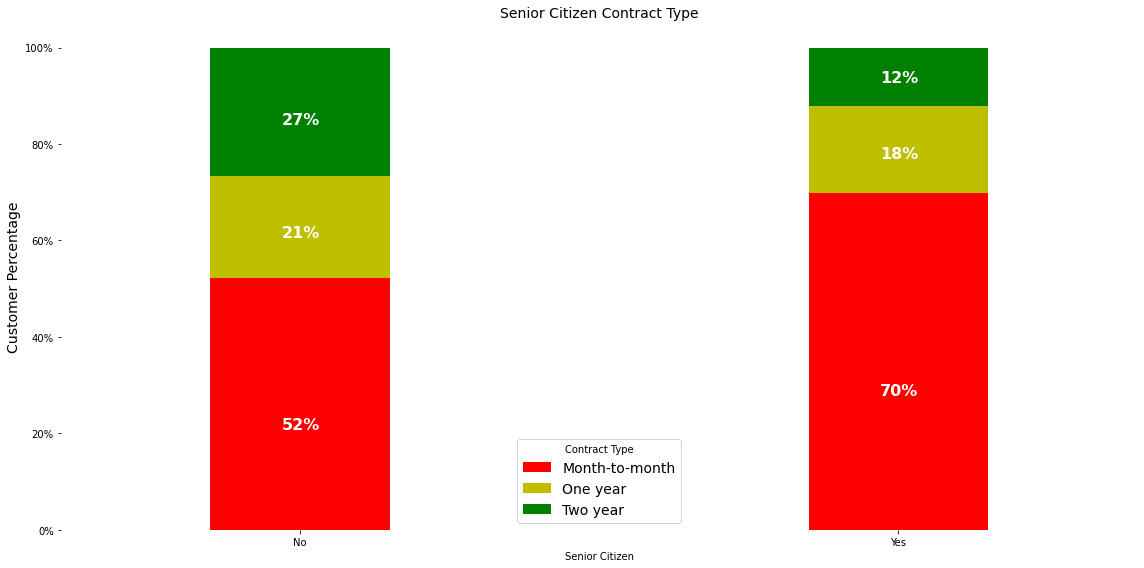

In [29]:
#Do seniors represent a higher proportion of MTM contracts? - Visualization
colors = ['r','y', 'g']
contract_churn = train.groupby(['senior_citizen', 'contract_type']).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (16,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Contract Type')
ax.set_ylabel('Customer Percentage',size = 14)
ax.set_title('Senior Citizen Contract Type',size = 14)
ax.set_xlabel('Senior Citizen')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .40 * width, p.get_y()+.4*height), #changed from .25 * width to .40 * width to center
                color = 'white',
                weight = 'bold',
                size = 16)

sns.despine(left = True, bottom = True)    
plt.tight_layout()

#### Churn Probability (Encoded)

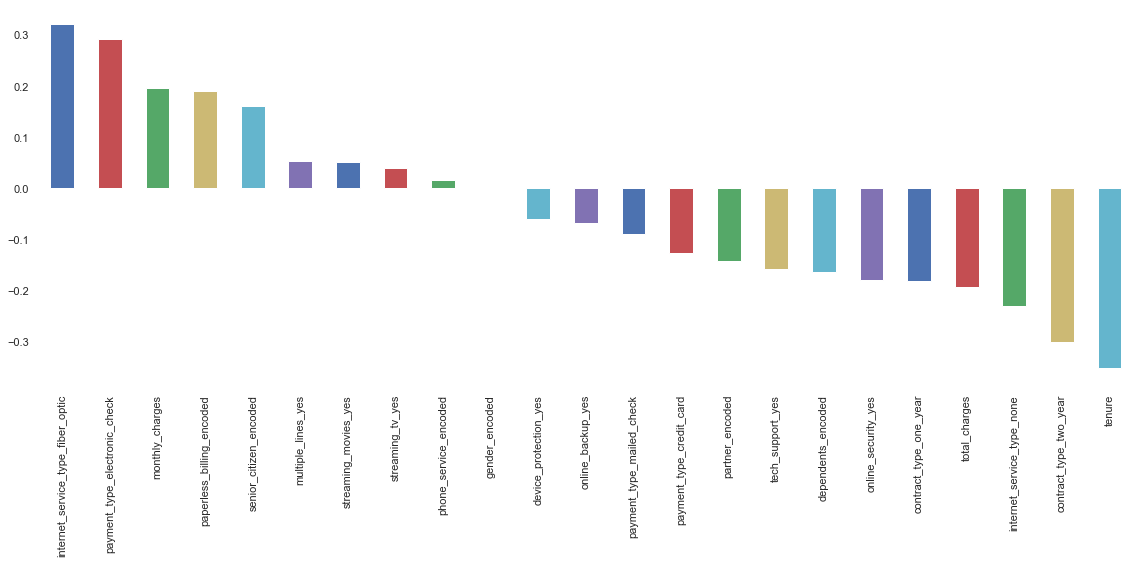

In [30]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(train)))
sns.set(style = 'white')
plt.figure(figsize = (16, 8))
train.corr()['churn_encoded'].drop('churn_encoded').sort_values(ascending = False).plot(kind = 'bar', color = my_colors)
sns.despine(left = True, bottom = True)
plt.tight_layout()
#plt.xticks(rotation = 80) 

#### Takeaways:
- The top predictors of churn are:
    - Fiber optic internet service
    - Electronic check payment type
    - Monthly charges
    - Paperless billing
    - Seniority
    

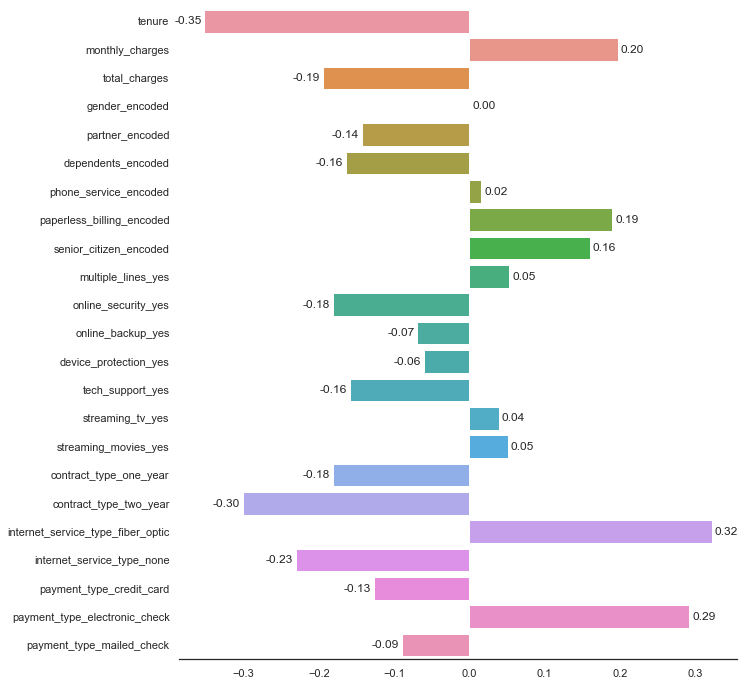

In [31]:
corr_matrix = train.corr().round(3)
corr_target = corr_matrix['churn_encoded'].drop('churn_encoded')


fig, ax = plt.subplots(figsize = (10, 12))

sns.barplot(x = corr_target.values, y = corr_target.index, ax = ax)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%.2f', fontsize = 12, fontweight = 'medium')

ax.axis = ('tight')
sns.despine(left = True)
plt.show()

In [32]:
categorical_columns = ['gender', 
                       'senior_citizen', 
                       'partner', 
                       'dependents', 
                       'phone_service', 
                       'multiple_lines', 
                       'online_security', 
                       'online_backup', 
                       'device_protection', 
                       'tech_support', 
                       'streaming_tv', 
                       'streaming_movies', 
                       'paperless_billing', 
                       'churn', 
                       'internet_service_type', 
                       'contract_type', 
                       'payment_type']


In [160]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

# Modeling

In [33]:
categorical_columns.append('churn')
categorical_columns.append('churn_encoded')


X_train = train.drop(columns = categorical_columns)
y_train = train.churn_encoded

X_validate = validate.drop(columns = categorical_columns)
y_validate = validate.churn_encoded

X_test = test.drop(columns = categorical_columns)
y_test = test.churn_encoded

### Establish a Baseline

In [34]:
# since most customers in this dataset did not churn, use mode as baseline

baseline = y_train.mode()

#boolean array
baseline_prediction = y_train == 0

baseline_accuracy = round(baseline_prediction.mean(),2)
print(f'Baseline Accuracy: {baseline_accuracy}') 

Baseline Accuracy: 0.73


### Decision Tree

In [174]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 123)
# model.fit(X , y)
clf = clf.fit(X_train, y_train)
#make predictions
y_predictions1 = clf.predict(X_train)
#estimate probability
y_pred_proba1 = clf.predict_proba(X_train)

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Classification report, Train:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_train, y_predictions1, output_dict = True)
pd.DataFrame(report)

Accuracy of Decision Tree Classifier on training set: 0.81
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.827745,0.708455,0.80696,0.768100,0.796052
recall,0.930820,0.464627,0.80696,0.697723,0.806960
f1-score,0.876262,0.561201,0.80696,0.718731,0.792555
support,2891.000000,1046.000000,0.80696,3937.000000,3937.000000


In [175]:
act_labels = ['Actually Retained','Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']
print('Confusion Matrix:')
print('~~~~~~~~~~~~~~~~~~~~~~')
pd.DataFrame(confusion_matrix(y_train, y_predictions1), index = act_labels, columns = col_labels)

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2691,200
Actually Churned,560,486


In [176]:
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions1, labels = [1, 0]).ravel()
#ALL = TP + TN + FP + FN

TN, FN, FP, TP

(2691, 560, 200, 486)

In [177]:
ALL = TP + TN + FP + FN
    
accuracy = (TP + TN)/ALL # How often did the model get it right?
precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
recall = TP/(TP+FN) # How many of the true positives were found?   
    
true_positive_rate = TP/(TP+FN) # Same as recall, actually
true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
support_pos = TP + FN # Number of actual positives in the sample
support_neg = FP + TN # Number of actual negatives in the sample
    
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"True Positive Rate: {true_positive_rate}")
print(f"True Negative Rate: {true_negative_rate}")
print(f"False Positive Rate: {false_positive_rate}")
print(f"False Negative Rate: {false_negative_rate}")
print(f"F1 Score: {f1_score}")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")


Accuracy: 0.8069596139192279
Precision: 0.7084548104956269
Recall: 0.4646271510516252
True Positive Rate: 0.4646271510516252
True Negative Rate: 0.9308197855413352
False Positive Rate: 0.06918021445866482
False Negative Rate: 0.5353728489483748
F1 Score: 0.5612009237875288
Support (0): 1046
Support (1): 2891


### Random Forest

In [178]:
rf = RandomForestClassifier(max_depth = 5, min_samples_leaf = 5,random_state = 123)

# fit the model on train
rf.fit(X_train, y_train)
#make predictions
y_predictions2 = rf.predict(X_train)
#estimate probability
y_pred_proba2 = rf.predict_proba(X_train)

# Use the model 
# We'll evaluate the model's performance on train and only train

y_predictions = rf.predict(X_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Classification report, Train:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
#produce the classification report on the y values and this models predicted y values
report = classification_report(y_train, y_predictions2, output_dict = True)
pd.DataFrame(report)

Accuracy of Random Forest Classifier on training set: 0.80
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.816821,0.728188,0.803404,0.772505,0.793273
recall,0.943964,0.414914,0.803404,0.679439,0.803404
f1-score,0.875802,0.528624,0.803404,0.702213,0.783562
support,2891.000000,1046.000000,0.803404,3937.000000,3937.000000


In [179]:
labels = ['Actually Retained','Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']
print('Confusion Matrix:')
print('~~~~~~~~~~~~~~~~~~~~~~')
pd.DataFrame(confusion_matrix(y_train, y_predictions2), index = labels, columns = col_labels)

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2729,162
Actually Churned,612,434


In [180]:
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions2, labels = [1, 0]).ravel()
ALL = TP + TN + FP + FN

TN, FN, FP, TP

(2729, 612, 162, 434)

### K Nearest Neighbors

In [181]:
#n_neighbour = 10

knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
y_predictions3 = knn.predict(X_train)
y_pred_proba3 = knn.predict_proba(X_train)

print('Accuracy of K Nearest Neighbors Classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Classification report, Train:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_train, y_predictions3, output_dict = True)
pd.DataFrame(report)

Accuracy of K Nearest Neighbors Classifier on training set: 0.81
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.817616,0.762832,0.809754,0.790224,0.803060
recall,0.953649,0.412046,0.809754,0.682848,0.809754
f1-score,0.880409,0.535071,0.809754,0.707740,0.788658
support,2891.000000,1046.000000,0.809754,3937.000000,3937.000000


In [182]:
labels = ['Actually Retained','Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']
print('Confusion Matrix:')
print('~~~~~~~~~~~~~~~~~~~~~~')
pd.DataFrame(confusion_matrix(y_train, y_predictions3), index = labels, columns = col_labels)

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2757,134
Actually Churned,615,431


In [183]:
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions3, labels = [1, 0]).ravel()
ALL = TP + TN + FP + FN

TN, FN, FP, TP

(2757, 615, 134, 431)

### Logistic Regression

In [184]:
logit7 = LogisticRegression(random_state = 123)

features = ['internet_service_type_fiber_optic',
            'payment_type_electronic_check',
            'tenure']

logit7.fit(X_train[features], y_train)

y_predictions4 = logit7.predict(X_train[features])
y_pred_proba4 = logit7.predict_proba(X_train[features])

print('Logistic Regression using fiber optic internet service, e-check, and tenure as features')
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logit7.score(X_train[features], y_train)))
print('Classification report, Train:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

report = classification_report(y_train, y_predictions4, output_dict = True)
pd.DataFrame(report)

Logistic Regression using fiber optic internet service, e-check, and tenure as features
Accuracy of Logistic Regression on training set: 0.80
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.825288,0.668044,0.796292,0.746666,0.783511
recall,0.916638,0.463671,0.796292,0.690154,0.796292
f1-score,0.868568,0.547404,0.796292,0.707986,0.783239
support,2891.000000,1046.000000,0.796292,3937.000000,3937.000000


In [185]:
labels = ['Actually Retained','Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']
print('Confusion Matrix:')
print('~~~~~~~~~~~~~~~~~~~~~~')
pd.DataFrame(confusion_matrix(y_train, y_predictions4), index = labels, columns = col_labels)

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2650,241
Actually Churned,561,485


In [186]:
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions4, labels = [1, 0]).ravel()
ALL = TP + TN + FP + FN

TN, FN, FP, TP

(2650, 561, 241, 485)

# Model Evaluation (Validate)

#### Decision Tree

In [187]:
y_predictions1 = clf.predict(X_validate)
#estimate probability
y_pred_proba1 = clf.predict_proba(X_validate)
print( 'Accuracy of Decision Tree Classifier on validation set: {:.4f}'.format(clf.score(X_validate, y_validate)))
print('Classification report, Validate:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_validate, y_predictions1, output_dict = True)
pd.DataFrame(report)

Accuracy of Decision Tree Classifier on validation set: 0.7953
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.825897,0.662879,0.795309,0.744388,0.782564
recall,0.913843,0.467914,0.795309,0.690879,0.795309
f1-score,0.867647,0.548589,0.795309,0.708118,0.782837
support,1033.000000,374.000000,0.795309,1407.000000,1407.000000


#### Random Forest

In [188]:
#make predictions
y_predictions2 = rf.predict(X_validate)
#estimate probability
y_pred_proba2 = rf.predict_proba(X_validate)
print( 'Accuracy of Random Forest Classifier on validation set: {:.4f}'.format(rf.score(X_validate, y_validate)))
print('Classification report, Validate:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_validate, y_predictions2, output_dict = True)
pd.DataFrame(report)

Accuracy of Random Forest Classifier on validation set: 0.7996
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.820666,0.694915,0.799574,0.757791,0.787240
recall,0.930300,0.438503,0.799574,0.684401,0.799574
f1-score,0.872051,0.537705,0.799574,0.704878,0.783177
support,1033.000000,374.000000,0.799574,1407.000000,1407.000000


#### KNN

In [189]:
y_predictions3 = knn.predict(X_validate)
y_pred_proba3 = knn.predict_proba(X_validate)
print( 'Accuracy of K Nearest Neighbors Classifier on validation set: {:.4f}'.format(knn.score(X_validate, y_validate)))
print('Classification report, Validate:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_validate, y_predictions3, output_dict = True)
pd.DataFrame(report)

Accuracy of K Nearest Neighbors Classifier on validation set: 0.7846
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.805184,0.668246,0.784648,0.736715,0.768784
recall,0.932236,0.377005,0.784648,0.654621,0.784648
f1-score,0.864065,0.482051,0.784648,0.673058,0.762520
support,1033.000000,374.000000,0.784648,1407.000000,1407.000000


#### Logistic Regression

In [195]:
y_predictions4 = logit7.predict(X_validate[features])
y_pred_proba4 = logit7.predict_proba(X_validate[features])
print('Accuracy of Logistic Regression classifier on validation set: {:.4f}'
      .format(logit7.score(X_validate[features], y_validate)))
print('Classification report, Validate:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_validate, y_predictions4, output_dict = True)
pd.DataFrame(report)

Accuracy of Logistic Regression classifier on validation set: 0.7989
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.835420,0.657439,0.798863,0.746430,0.788111
recall,0.904163,0.508021,0.798863,0.706092,0.798863
f1-score,0.868433,0.573152,0.798863,0.720793,0.789944
support,1033.000000,374.000000,0.798863,1407.000000,1407.000000


### Model  Test Performance: Logistic Regression

In [196]:
y_predictions5 = logit7.predict(X_test[features])
y_pred_proba5 = logit7.predict_proba(X_test[features])

print('Accuracy of Logistic Regression classifier on test set: {:.4f}'
      .format(logit7.score(X_test[features], y_test)))
print('Classification report, Validate:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
report = classification_report(y_test, y_predictions5, output_dict = True)
pd.DataFrame(report)

Accuracy of Logistic Regression classifier on test set: 0.7767
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.823088,0.601695,0.776659,0.712392,0.764199
recall,0.886199,0.474388,0.776659,0.680293,0.776659
f1-score,0.853478,0.530511,0.776659,0.691995,0.767571
support,1239.000000,449.000000,0.776659,1688.000000,1688.000000


In [ ]:
from sklearn.metrics import roc_curv, auc
from scipy.import interp

X_train2 = X_train([features])

cv = StratifiedKFold(y_train,
                    n_folds = 3,
                    random_state = 1)

fig = plt.figure(figsize = (7 , 5))

mean_tpr = 0.0
meanfpr = np.linspace(0, 1, 100)
all_tpr = []

for i in (train, test)in enumerate(cv):
    probas = pipeline_lr.fit(X_train2[train],
                            y_train[train]).predict_proba(X_train2[test])
                            fpr, tpr, thresholds = roc_curve(y_train[test],
                                                            probas[:, 1],
                                                            pos_label = 1)
                            mean_tpr += interp(mean_fpr, fpr, tpr)
                            mean_tpr[0] = 0.0
                            roc_auc = auc(fpr, tpr)
                            plt.plot(fpr,
                                    tpr,
                                    1w = 1,
                                    label = 'ROC fold %d (area = %0.2f)'
                                    % (i + 1, roc_auc))
plt.plot([0,1],
        [0,1],
        linestyle = '--',
        color = (0.6, 0.6, 0.6),
        label = 'Random Guessing')

mean_tpr / = len(cv)
mean_tpr[-1] = 1.0
mean_auc  = auc(mean_fpr)

In [ ]:
y_test_predictions = logit7.predict(X_test[features])
y_test_probability = logit7.predict_proba(X_test[features])

predictions = pd.DataFrame({
    'customer_id': X_test.customer_id,
    'predictions': y_test_predictions,
    'probability_of_churn': y_test_probability
})
predictions.to_csv('predictions.csv')